Positive learning

In [1]:
import pandas as pd

dir = 'out/'
# read the data

benign = pd.read_csv(dir + 'benign.csv')
mirai = pd.read_csv(dir + 'mirai.csv')
okiru = pd.read_csv(dir + 'okiru.csv')

benign.head()

,target,id.orig_h_1,id.orig_h_2,id.orig_h_3,id.orig_h_4,id.resp_h_1,id.resp_h_2,id.resp_h_3,id.resp_h_4,missed_bytes,...,history_B,history_S,history_d,history_r,id.orig_p_dyn,id.orig_p_reg,id.orig_p_wk,id.resp_p_dyn,id.resp_p_reg,id.resp_p_wk
0,0,154,197,41,78,192,168,1,198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,192,168,1,198,147,231,100,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,192,168,1,198,147,231,100,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,192,168,1,198,147,231,100,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,84,244,188,242,192,168,1,198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Train test split

In [2]:
# select the first 80% of benign as X_train
X_train = benign[:int(len(benign)*0.8)]

# select the last 20% of benign as benign_test
benign_test = benign[int(len(benign)*0.8):]

In [4]:
y_train = X_train['target']
X_train = X_train.drop(['target'], axis=1)

In [3]:
# select len(benign_test) rows from mirai as mirai_test and okiru_test
mirai_test = mirai.sample(n=len(benign_test))
okiru_test = okiru.sample(n=len(benign_test))

# combine benign_test and mirai_test as X_test_mirai
X_test_mirai = pd.concat([benign_test, mirai_test])

# combine benign_test and okiru_test as X_test_okiru
X_test_okiru = pd.concat([benign_test, okiru_test])

In [5]:
y_test_mirai = X_test_mirai['target']
X_test_mirai = X_test_mirai.drop(['target'], axis=1)

y_test_okiru = X_test_okiru['target']
X_test_okiru = X_test_okiru.drop(['target'], axis=1)

# print value counts of y_test_mirai and y_test_okiru
print(y_test_mirai.value_counts())
print(y_test_okiru.value_counts())

0    15724
1    15724
Name: target, dtype: int64
0    15724
2    15724
Name: target, dtype: int64


In [6]:
# change 1 to -1 and 0 to 1 in y_test_mirai
y_test_mirai = y_test_mirai.replace(1, -1)
y_test_mirai = y_test_mirai.replace(0, 1)

# change 2 to -1 and 0 to 1 in y_test_okiru
y_test_okiru = y_test_okiru.replace(2, -1)
y_test_okiru = y_test_okiru.replace(0, 1)

Positive training

In [7]:
from sklearn.ensemble import IsolationForest

# create an IsolationForest model
iso = IsolationForest(n_estimators=100, contamination=0.01)

# fit the model with X_train
iso.fit(X_train)

# predict the target of X_test_mirai
y_pred_mirai = iso.predict(X_test_mirai)

# predict the target of X_test_okiru
y_pred_okiru = iso.predict(X_test_okiru)

C:\Users\Stone\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


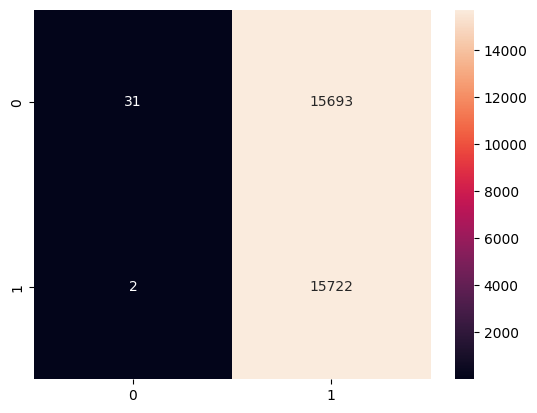

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# create confusion matrix for y_test_mirai and y_pred_mirai
cm = confusion_matrix(y_test_mirai, y_pred_mirai)

# create heatmap for cm
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

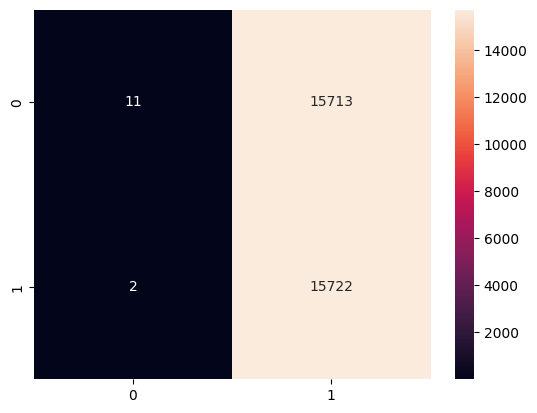

In [10]:
# create confusion matrix for y_test_okiru and y_pred_okiru
cm = confusion_matrix(y_test_okiru, y_pred_okiru)

# create heatmap for cm
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [12]:
from sklearn.metrics import classification_report

# create a list of contamination values
contamination_list = [0.01, 0.05, 0.1]

# for each contamination value
for contamination in contamination_list:
    # create an IsolationForest model
    iso = IsolationForest(n_estimators=100, contamination=contamination)
    # fit the model with X_train
    iso.fit(X_train)
    # predict the target of X_test_mirai
    y_pred_mirai = iso.predict(X_test_mirai)
    # print classification report for y_test_mirai and y_pred_mirai
    print('Contamination: ', contamination)
    print(classification_report(y_test_mirai, y_pred_mirai))
    print()

C:\Users\Stone\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination:  0.01
              precision    recall  f1-score   support

          -1       1.00      0.19      0.32     15724
           1       0.55      1.00      0.71     15724

    accuracy                           0.60     31448
   macro avg       0.78      0.60      0.52     31448
weighted avg       0.78      0.60      0.52     31448




C:\Users\Stone\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination:  0.05
              precision    recall  f1-score   support

          -1       0.99      0.75      0.85     15724
           1       0.80      0.99      0.88     15724

    accuracy                           0.87     31448
   macro avg       0.89      0.87      0.87     31448
weighted avg       0.89      0.87      0.87     31448




C:\Users\Stone\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination:  0.1
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99     15724
           1       1.00      0.99      0.99     15724

    accuracy                           0.99     31448
   macro avg       0.99      0.99      0.99     31448
weighted avg       0.99      0.99      0.99     31448




In [15]:
# create a model with contamination=0.1
iso = IsolationForest(n_estimators=100, contamination=0.1)

# fit the model with X_train
iso.fit(X_train)

# predict the target of X_test_mirai
y_pred_mirai = iso.predict(X_test_mirai)

# predict the target of X_test_okiru
y_pred_okiru = iso.predict(X_test_okiru)

C:\Users\Stone\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


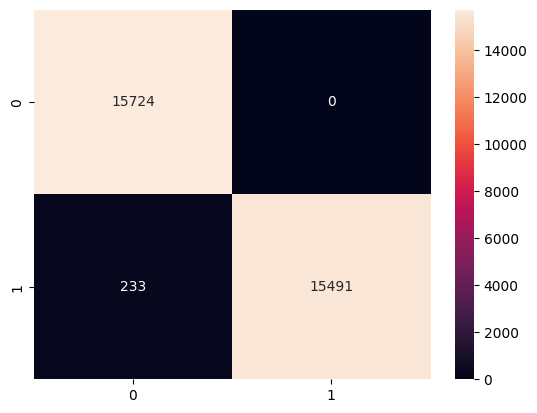

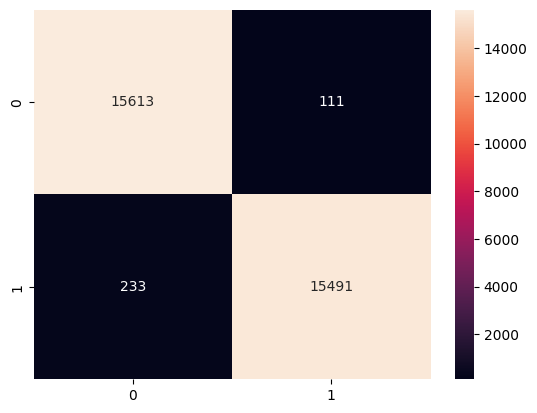

In [16]:
# plot confusion matrix for y_test_mirai and y_pred_mirai
cm = confusion_matrix(y_test_mirai, y_pred_mirai)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# plot confusion matrix for y_test_okiru and y_pred_okiru
cm = confusion_matrix(y_test_okiru, y_pred_okiru)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [17]:
print(classification_report(y_test_mirai, y_pred_mirai))
print(classification_report(y_test_okiru, y_pred_okiru))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99     15724
           1       1.00      0.99      0.99     15724

    accuracy                           0.99     31448
   macro avg       0.99      0.99      0.99     31448
weighted avg       0.99      0.99      0.99     31448

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99     15724
           1       0.99      0.99      0.99     15724

    accuracy                           0.99     31448
   macro avg       0.99      0.99      0.99     31448
weighted avg       0.99      0.99      0.99     31448



In [18]:
from sklearn.svm import OneClassSVM

# create a OneClassSVM model
svm = OneClassSVM()

# fit the model with X_train
svm.fit(X_train)

# predict the target of X_test_mirai
y_pred_mirai = svm.predict(X_test_mirai)

# predict the target of X_test_okiru
y_pred_okiru = svm.predict(X_test_okiru)

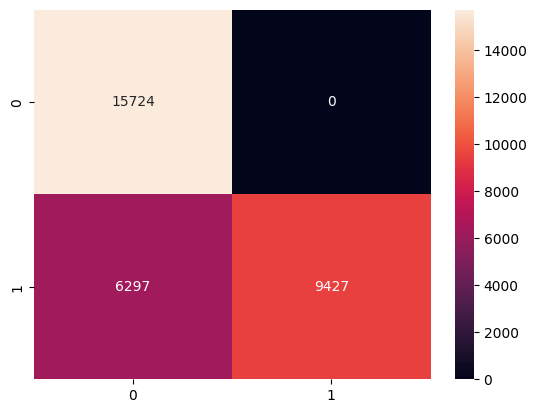

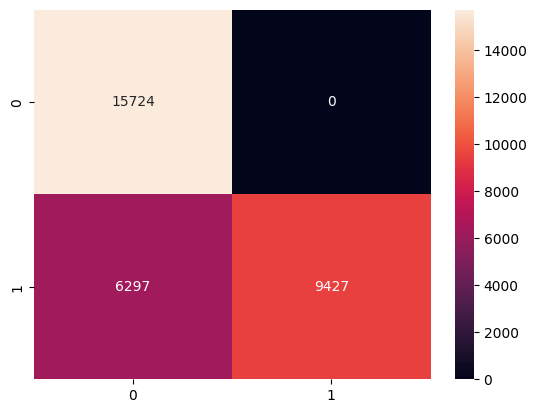

In [19]:
# plot confusion matrix for y_test_mirai and y_pred_mirai
cm = confusion_matrix(y_test_mirai, y_pred_mirai)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# plot confusion matrix for y_test_okiru and y_pred_okiru
cm = confusion_matrix(y_test_okiru, y_pred_okiru)

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [20]:
# create a list of kernel values
kernel_list = ['linear', 'rbf']

# create a list of gamma values
gamma_list = [0.01, 0.1]

# create a list of nu values
nu_list = [0.01, 0.1]

# create a list of conbatination of kernel, gamma, and nu
params = [[kernel, gamma, nu] for kernel in kernel_list for gamma in gamma_list for nu in nu_list]

# for each combination of kernel, gamma, and nu
for kernel, gamma, nu in params:
    # create a OneClassSVM model
    svm = OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
    # fit the model with X_train
    svm.fit(X_train)
    # predict the target of X_test_mirai
    y_pred_mirai = svm.predict(X_test_mirai)
    # print classification report for y_test_mirai and y_pred_mirai
    print('Kernel: ', kernel, 'Gamma: ', gamma, 'Nu: ', nu)
    print(classification_report(y_test_mirai, y_pred_mirai))
    print()


Kernel:  linear Gamma:  0.01 Nu:  0.01
              precision    recall  f1-score   support

          -1       0.98      0.12      0.21     15724
           1       0.53      1.00      0.69     15724

    accuracy                           0.56     31448
   macro avg       0.76      0.56      0.45     31448
weighted avg       0.76      0.56      0.45     31448


Kernel:  linear Gamma:  0.01 Nu:  0.1
              precision    recall  f1-score   support

          -1       0.95      0.56      0.71     15724
           1       0.69      0.97      0.81     15724

    accuracy                           0.77     31448
   macro avg       0.82      0.77      0.76     31448
weighted avg       0.82      0.77      0.76     31448


Kernel:  linear Gamma:  0.1 Nu:  0.01
              precision    recall  f1-score   support

          -1       0.98      0.12      0.21     15724
           1       0.53      1.00      0.69     15724

    accuracy                           0.56     31448
   macro av